In [191]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
#mpl.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7534]:
sns.set(style="darkgrid")
sns.set(font_scale=1.5)

RESULT_DIR = '../S2S_3_60/results/'
PLOT_DIR = '../exps/SEncoder/newDU/me/1024/v11/'

logs = {
  'seq2seq_sample_imagenet_log.csv': 'Student-forcing'
  #'seq2seq_teacher_imagenet_log.csv': 'Student-forcing'
}

In [7535]:
def plot_training_curves():
    ''' Plot the validation loss, navigation error and success rate during training. '''

    font = {
      'size'   : 12
    }
    mpl.rc('font', **font)

    dfs = {}
    for log in logs:
        dfs[log] = pd.read_csv(PLOT_DIR+log)
        print(len(dfs[log]))
        print(dfs[log].keys())
        
    plots = [
        ('Loss', 'loss',['val_seen loss', 'val_unseen loss', 'train loss']), #, 'loss_ctrl_f'
        ('SPL', '%', ['val_seen spl', 'val_unseen spl']),
        ('Success', '%', ['val_seen success_rate', 'val_unseen success_rate']), 
        ('Traj Length', 'm', ['val_seen lengths', 'val_unseen lengths']),
        ('Steps', 'n', ['val_seen steps', 'val_unseen steps']),
        ('Oracle SR', 'm', ['val_seen oracle_rate', 'val_unseen oracle_rate'])
    ]

    colors = {
      'Student-forcing Val Seen': 'C0',
      'Student-forcing Val Unseen': 'C2',
      'Student-forcing Train': 'C4',
      'Teacher-forcing Val Seen': 'C1',
      'Teacher-forcing Val Unseen': 'C3',
      'Teacher-forcing Train': 'C5'
    }
    
    rows = 3
    cols = 2
    nsize = 2
    fig, axes = plt.subplots(nrows=rows, ncols=cols, squeeze=True, figsize=(13, 16.25))
    
    handles = []
    labels = []
    maxes = {'val_seen success_rate':0, 'val_unseen sr':0, 'val_seen iter':0, 
             'val_unseen success_rate':0, 'val_seen sr':0, 'val_unseen iter':0}
    sums = {'val_seen success_rate':0, 'iter':0, 'val_unseen success_rate':0}
    
    for i,(title, ylabel, x_vars) in enumerate(plots):
        for log in logs:
            df = dfs[log]
            x = df['Unnamed: 0'] # df['iteration']
            for col_name in x_vars:
                y = df[col_name]
                label = ' Train'
                if 'unseen' in col_name:
                    label = ' Val Unseen'
                elif 'seen' in col_name:
                    label = ' Val Seen'
                
                if col_name in maxes:
                    for v_id, v in enumerate(y):
                        if 'val_seen' in col_name:
                            if v > maxes[col_name]:
                                maxes[col_name] = v
                                maxes['val_seen iter'] = v_id
                        elif 'val_unseen' in col_name:
                            if v > maxes[col_name]:
                                maxes[col_name] = v
                                maxes['val_unseen iter'] = v_id
                                
                        sr_sum = df['val_seen success_rate'][v_id] + df['val_unseen success_rate'][v_id]
                        if sr_sum > (sums['val_seen success_rate'] + sums['val_unseen success_rate']):
                            sums['val_seen success_rate'] = df['val_seen success_rate'][v_id]
                            sums['val_unseen success_rate'] = df['val_unseen success_rate'][v_id]
                            sums['iter'] = int(x[v_id])
                            
                if i == 0:
                    label = logs[log]+label
                    labels.append(labels)
                    handles.append(axes[int(i/cols), i%cols].plot(x,y, colors[label], label=label))
                else:
                    axes[int(i/cols), i%cols].plot(x,y, colors[logs[log]+label], label=logs[log]+label)
            
            if title == 'Success':
                maxes['val_unseen sr'] = df['val_unseen success_rate'][maxes['val_seen iter']]
                maxes['val_seen sr'] = df['val_seen success_rate'][maxes['val_unseen iter']]
                maxes['val_seen iter'] = int(x[maxes['val_seen iter']])
                maxes['val_unseen iter'] = int(x[maxes['val_unseen iter']])
                
        axes[int(i/cols), i%cols].set_title(title)
        axes[int(i/cols), i%cols].set_xlabel('Iteration')
        axes[int(i/cols), i%cols].set_ylabel(ylabel)

    plt.tight_layout()
    fig.subplots_adjust(bottom=0.1)
    handles, labels = axes[0,0].get_legend_handles_labels()
    axes[2,0].legend(handles = handles, labels=labels, loc='upper center', 
                     bbox_to_anchor=(1.1, -0.15), fancybox=False, shadow=False, ncol=3)
    plt.setp(axes[2,0].get_legend().get_texts(), fontsize='12')
    plt.show()
    #plt.savefig('%s/training.png' % (PLOT_DIR))
    
    print('maxes:')
    print(json.dumps(maxes, indent=2))
    print('sums:')
    print(json.dumps(sums, indent=2))

600
Index(['Unnamed: 0', 'iteration', 'train loss', 'val_seen loss',
       'val_seen nav_error', 'val_seen oracle_error', 'val_seen steps',
       'val_seen lengths', 'val_seen success_rate', 'val_seen oracle_rate',
       'val_seen spl', 'val_unseen loss', 'val_unseen nav_error',
       'val_unseen oracle_error', 'val_unseen steps', 'val_unseen lengths',
       'val_unseen success_rate', 'val_unseen oracle_rate', 'val_unseen spl'],
      dtype='object')


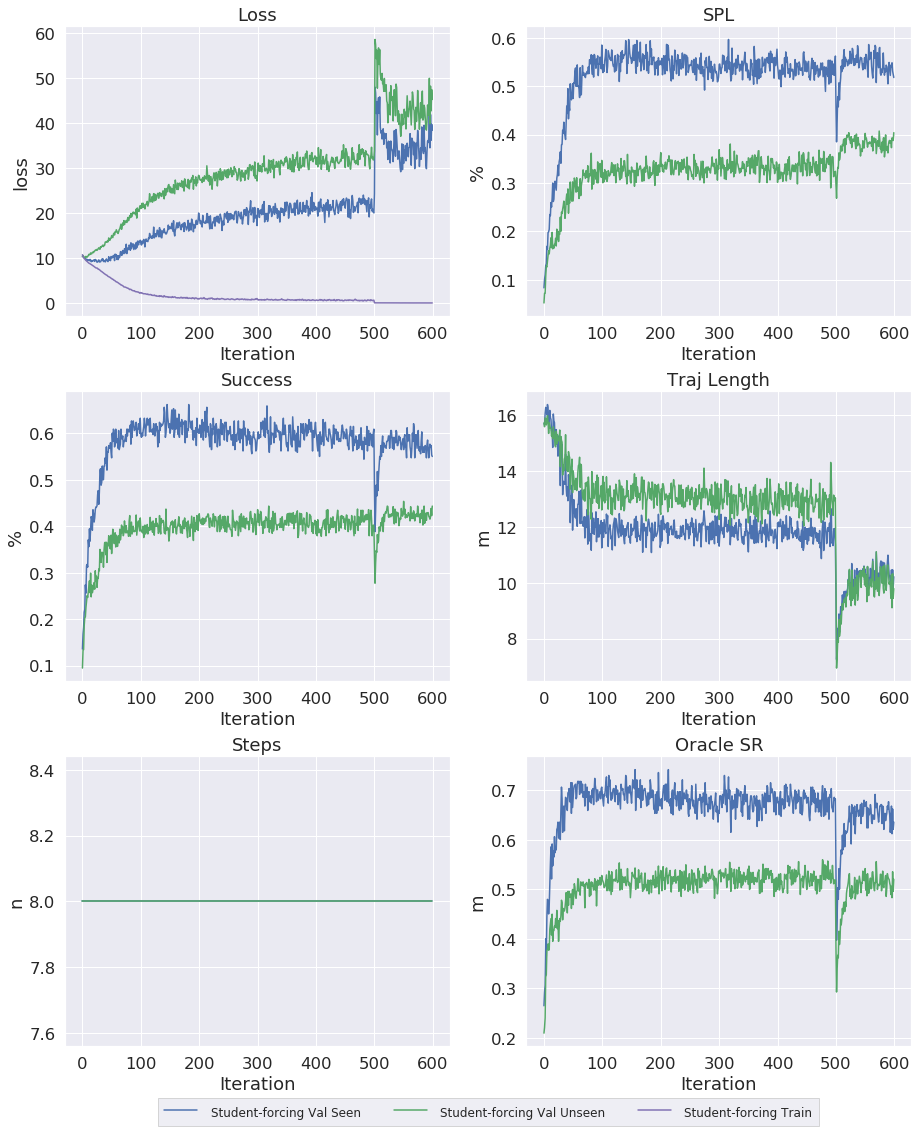

maxes:
{
  "val_seen success_rate": 0.6617647058823529,
  "val_unseen sr": 0.3959131545338442,
  "val_seen iter": 145,
  "val_unseen success_rate": 0.4533844189016602,
  "val_seen sr": 0.5647058823529412,
  "val_unseen iter": 550
}
sums:
{
  "val_seen success_rate": 0.6558823529411765,
  "iter": 213,
  "val_unseen success_rate": 0.41890166028097053
}


In [7536]:
plot_training_curves()

In [7529]:
def plot_curves():
    ''' Plot the validation loss, navigation error and success rate during training. '''

    font = {
      'size'   : 12
    }
    mpl.rc('font', **font)

    dfs = {}
    for log in logs:
        dfs[log] = pd.read_csv(PLOT_DIR+log)
        print(len(dfs[log]))
        print(dfs[log].keys())
        
    plots = [
        ('Loss', 'loss',['val_seen loss', 'val_unseen loss', 'train loss']), #, 'loss_ctrl_f'
        ('SPL', '%', ['val_seen spl', 'val_unseen spl']),
        ('Success', '%', ['val_seen success_rate', 'val_unseen success_rate']), 
        ('Traj Length', 'm', ['val_seen lengths', 'val_unseen lengths']),
        ('Steps', 'n', ['val_seen steps', 'val_unseen steps']),
        ('Oracle SR', 'm', ['val_seen oracle_rate', 'val_unseen oracle_rate'])
    ]

    colors = {
      'Student-forcing Val Seen': 'C0',
      'Student-forcing Val Unseen': 'C2',
      'Student-forcing Train': 'C4',
      'Teacher-forcing Val Seen': 'C1',
      'Teacher-forcing Val Unseen': 'C3',
      'Teacher-forcing Train': 'C5'
    }
    
    rows = 3
    cols = 2
    nsize = 2
    fig, axes = plt.subplots(nrows=rows, ncols=cols, squeeze=True, figsize=(13, 16.25))
    
    handles = []
    labels = []
    maxes = {'val_seen spl':0, 'val_unseen SPL':0, 'val_seen iter':0, 
             'val_unseen spl':0, 'val_seen SPL':0, 'val_unseen iter':0}
    sums = {'val_seen spl':0, 'iter':0, 'val_unseen spl':0}
    
    for i,(title, ylabel, x_vars) in enumerate(plots):
        for log in logs:
            df = dfs[log]
            x = df['Unnamed: 0'] #df['iteration']
            for col_name in x_vars:
                y = df[col_name]
                label = ' Train'
                if 'unseen' in col_name:
                    label = ' Val Unseen'
                elif 'seen' in col_name:
                    label = ' Val Seen'
                
                if col_name in maxes:
                    for v_id, v in enumerate(y):
                        if 'val_seen' in col_name:
                            if v > maxes[col_name]:
                                maxes[col_name] = v
                                maxes['val_seen iter'] = v_id
                        elif 'val_unseen' in col_name:
                            if v > maxes[col_name]:
                                maxes[col_name] = v
                                maxes['val_unseen iter'] = v_id
                                
                        sr_sum = df['val_seen spl'][v_id] + df['val_unseen spl'][v_id]
                        if sr_sum > (sums['val_seen spl'] + sums['val_unseen spl']):
                            sums['val_seen spl'] = df['val_seen spl'][v_id]
                            sums['val_unseen spl'] = df['val_unseen spl'][v_id]
                            sums['iter'] = int(x[v_id])
                            
                if i == 0:
                    label = logs[log]+label
                    labels.append(labels)
                    handles.append(axes[int(i/cols), i%cols].plot(x,y, colors[label], label=label))
                else:
                    axes[int(i/cols), i%cols].plot(x,y, colors[logs[log]+label], label=logs[log]+label)
            
            if title == 'Success':
                maxes['val_unseen SPL'] = df['val_unseen spl'][maxes['val_seen iter']]
                maxes['val_seen SPL'] = df['val_seen spl'][maxes['val_unseen iter']]
                maxes['val_seen iter'] = int(x[maxes['val_seen iter']])
                maxes['val_unseen iter'] = int(x[maxes['val_unseen iter']])
                
        axes[int(i/cols), i%cols].set_title(title)
        axes[int(i/cols), i%cols].set_xlabel('Iteration')
        axes[int(i/cols), i%cols].set_ylabel(ylabel)

    plt.tight_layout()
    fig.subplots_adjust(bottom=0.1)
    handles, labels = axes[0,0].get_legend_handles_labels()
    axes[2,0].legend(handles = handles, labels=labels, loc='upper center', 
                     bbox_to_anchor=(1.1, -0.15), fancybox=False, shadow=False, ncol=3)
    plt.setp(axes[2,0].get_legend().get_texts(), fontsize='12')
    plt.show()
    #plt.savefig('%s/training.png' % (PLOT_DIR))
    
    print('maxes:')
    print(json.dumps(maxes, indent=2))
    print('sums:')
    print(json.dumps(sums, indent=2))

319
Index(['Unnamed: 0', 'iteration', 'train loss', 'val_seen loss',
       'val_seen nav_error', 'val_seen oracle_error', 'val_seen steps',
       'val_seen lengths', 'val_seen success_rate', 'val_seen oracle_rate',
       'val_seen spl', 'val_unseen loss', 'val_unseen nav_error',
       'val_unseen oracle_error', 'val_unseen steps', 'val_unseen lengths',
       'val_unseen success_rate', 'val_unseen oracle_rate', 'val_unseen spl'],
      dtype='object')


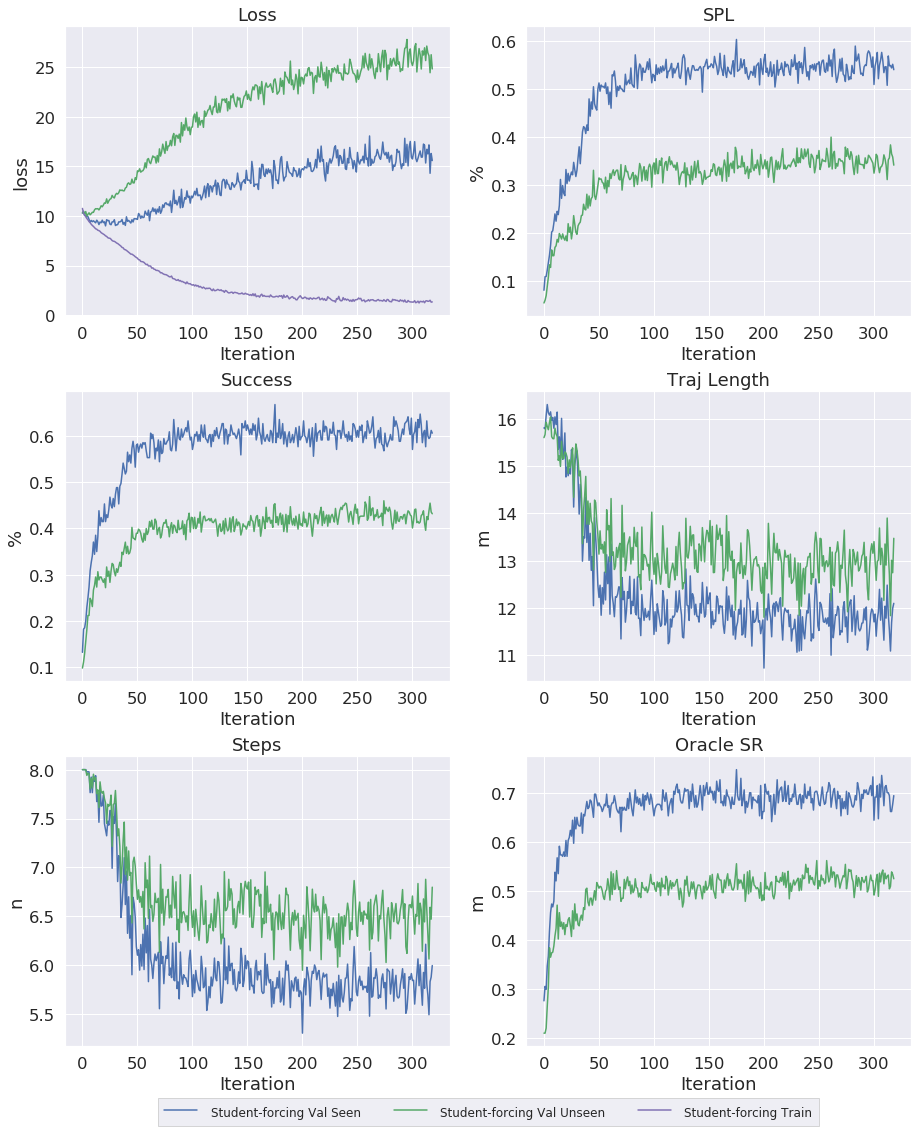

maxes:
{
  "val_seen spl": 0.6028656902151359,
  "val_unseen SPL": 0.36963751306209575,
  "val_seen iter": 175,
  "val_unseen spl": 0.3998397253054908,
  "val_seen SPL": 0.5603434884412768,
  "val_unseen iter": 261
}
sums:
{
  "val_seen spl": 0.6028656902151359,
  "iter": 175,
  "val_unseen spl": 0.36963751306209575
}


In [7530]:
plot_curves()

In [205]:
dfs = {}
for log in logs:
    dfs[log] = pd.read_csv(PLOT_DIR+log)

iter_id = 515
for log in logs:
    df = dfs[log][iter_id-1: iter_id]
    print(df)

     Unnamed: 0  iteration  train loss  val_seen loss  val_seen nav_error  \
514         514      37600    4.441849       8.258618            2.747782   

     val_seen oracle_error  val_seen steps  val_seen lengths  \
514               1.703045        5.741176         11.362919   

     val_seen success_rate  val_seen oracle_rate  val_seen spl  \
514               0.711765              0.802941      0.652597   

     val_unseen loss  val_unseen nav_error  val_unseen oracle_error  \
514        16.215017              5.472449                 3.805939   

     val_unseen steps  val_unseen lengths  val_unseen success_rate  \
514          6.383142           12.819082                 0.446999   

     val_unseen oracle_rate  val_unseen spl  
514                0.536398        0.377944  


In [7538]:
data_path = '../exps/SEncoder/newDU/me/1024/v12/snapshots/params.json'
data = json.load(open(data_path, 'rb'))

print(json.dumps(data, indent=2))

{
  "train_vocab": "train_vocab.txt",
  "trainval_vocab": "trainval_vocab.txt",
  "min_count": 5,
  "use_glove": false,
  "glove_path": "tasks/R2R/data/train_glove.npy",
  "result_dir": "tasks/R2R/exps/SEncoder/newDU/me/1024/v12/results/",
  "snapshot_dir": "tasks/R2R/exps/SEncoder/newDU/me/1024/v12/snapshots/",
  "plot_dir": "tasks/R2R/exps/SEncoder/newDU/me/1024/v12/plots/",
  "max_input_length": 80,
  "batch_size": 100,
  "max_episode_len": 8,
  "word_embedding_size": 256,
  "action_embedding_size": 32,
  "hidden_size": 1024,
  "enc_hidden_size": 1024,
  "feature_store": "img_features/ResNet-152-imagenet.tsv",
  "feature_size": 2048,
  "n_iters": 60000,
  "n_iters_resume": 0,
  "n_iters_pretrain_resume": 0,
  "log_every": 100,
  "sc_after": 50000,
  "dropout_ratio": 0.5,
  "learning_rate": 0.0001,
  "sc_learning_rate": 2e-05,
  "sc_reward_scale": 1.0,
  "sc_discouted_immediate_r_scale": 0.0,
  "sc_length_scale": 0.0,
  "weight_decay": 0.0005,
  "feedback_method": "sample",
  "bidire